In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 数据可视化

In [2]:
path = "exp2data1.txt"
data = pd.read_csv(path, names=["exam1", "exam2", "accepted"])
data.head()

,exam1,exam2,accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


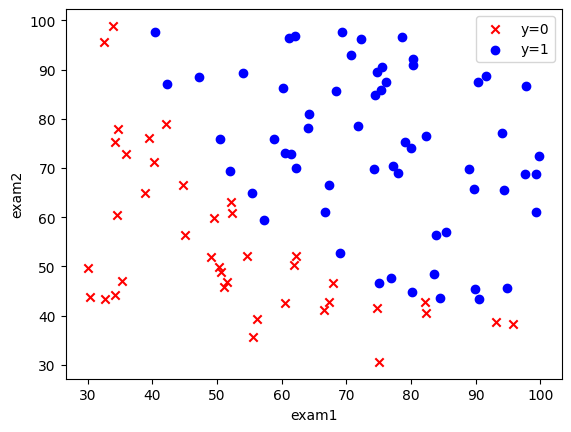

In [3]:
fig, ax = plt.subplots()
ax.scatter(data[data["accepted"]==0]["exam1"], data[data["accepted"]==0]["exam2"], c="r", marker="x", label="y=0")
ax.scatter(data[data["accepted"]==1]["exam1"], data[data["accepted"]==1]["exam2"], c="b", marker="o", label="y=1")
ax.legend()

ax.set(xlabel="exam1", ylabel="exam2")
plt.show()

## 构造数据集

In [4]:
def getXY(data):
    data.insert(0, "ones", 1)
    X = data.iloc[:,0:-1].values
    Y_ = data.iloc[:,-1]
    Y = Y_.values.reshape(len(Y_), 1)
        
    return X, Y

In [5]:
X, Y = getXY(data)

In [6]:
def sigmod(z):
    return 1 / (1 + np.exp(-z))

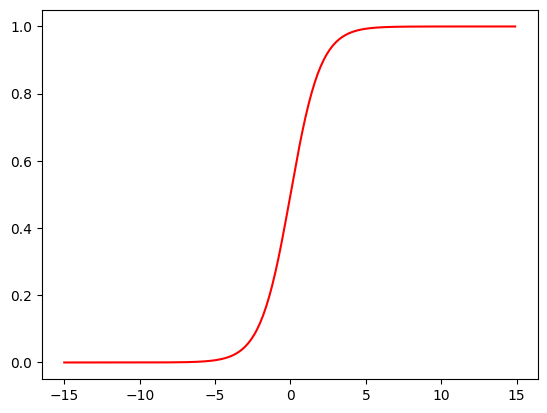

In [7]:
x = np.arange(-15, 15, 0.1)
plt.plot(x, sigmod(x), c="r")
plt.show()

In [8]:
theta = np.zeros((3, 1))

In [9]:
def costFunc(X, theta, Y):
    A = sigmod(X @ theta)
    first = (-Y) * np.log(A)
    second = -(1 - Y) * np.log(1 - A)
    
    return np.mean(first + second)

In [10]:
X.shape, Y.shape, theta.shape

((100, 3), (100, 1), (3, 1))

In [11]:
cost_init = costFunc(X, theta, Y)
print(cost_init)

0.6931471805599453


## 梯度下降

In [12]:
def gradientDescent(X, theta, Y, iters, alpha):
    costs = []
    for i in range(iters):
        A = sigmod(X @ theta)
        theta = theta - alpha * X.T @ (A - Y) / len(X)
        cost = costFunc(X, theta, Y)
        costs.append(cost)
    
    return costs, theta

In [13]:
alpha = 0.003
iters = 1000000

In [14]:
costs, theta_final = gradientDescent(X, theta, Y, iters, alpha)

## 预测

In [15]:
def predict(X, theta):
    prob = sigmod(X @ theta)
    return [1 if i >= 0.5 else 0 for i in prob]

In [16]:
y_ = np.array(predict(X, theta_final))
y_predict = y_.reshape(len(y_), 1)

acc = np.mean(y_predict == Y)
print(acc)

0.89


In [17]:
b = - theta_final[0,0] / theta_final[2, 0]
a = - theta_final[1,0] / theta_final[2, 0]

In [18]:
x = np.linspace(20, 100, 100)
f = b + a * x

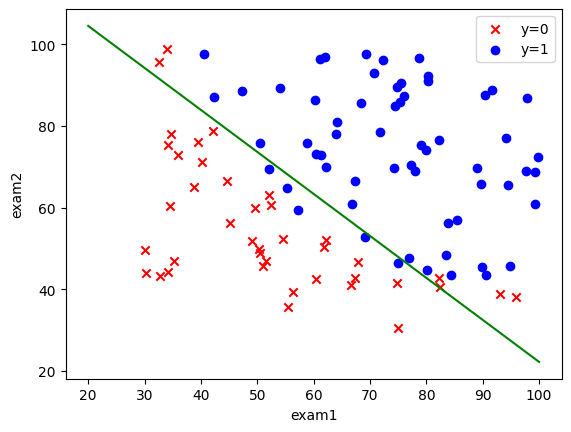

In [19]:
fig, ax = plt.subplots()
ax.scatter(data[data["accepted"]==0]["exam1"], data[data["accepted"]==0]["exam2"], c="r", marker="x", label="y=0")
ax.scatter(data[data["accepted"]==1]["exam1"], data[data["accepted"]==1]["exam2"], c="b", marker="o", label="y=1")
ax.legend()

ax.set(xlabel="exam1", ylabel="exam2")
ax.plot(x, f, c="g")
plt.show()